# Actividad Semanal 4
*Alumnos* - **Axel Alejandro Tlatoa Villavicencio - A01363351**, **Juan Villamil - A0**

*Profesor* - **Jobish Vallikavungal Devassia**

*Materia* - **Ciencia y Analítica de Datos**

*Fecha* - **11 de Octubre del 2022**

#Instrucciones 

Parte 1: Ejercicio guiado 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.
Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.
Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?
¿Cuál es la variación de los datos que representan esos componentes?
¿Cuál es la pérdida de información después de realizar PCA?
De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
 

Extensión: 200 palabras o más entre todas las respuestas. Sigue el formato pregunta-respuesta.

Importante: Entrega en Canvas tu documento en formato PDF /liga del GitHub incluyendo las partes de la actividad y en Github tu Notebook con el ejercicio.

Incluye en tu documento PDF cada uno de los siguientes puntos:

Portada con datos generales: Nombre de la entrega, tu nombre, matrícula, materia, profesor, fecha...
Descripción del entendimiento de los 3 puntos indicados en la parte 1
Captura de los resultados del programa y explicación de cómo funciona el código 
Respuesta a las 5 preguntas de la parte 2
Modalidad: Equipo (si quiere hacerlo de forma individual, avise a sus profesores tutores al entregar por correo).
Medio de realización/entrega: PDF o la liga del GitHub en Canvas en el botón "Entregar Tarea" y Notebook en GitHub  https://classroom.github.com/a/1Aqvo79rEnlaces a un sitio externo. 
Formato: PDF/liga url


# Parte I

Para comenzar el análisis de los datos, empezaremos definiendo las librerías pertinentes, luego se obtendrán los datos mediante una variable denominada *url* para cargar los datos, se puede definir el formato al ingresar al link y analizar que todos los datos están separados mediante comas, indicando formato tipo *.csv* (commas separated values). Se abrirá el archivo y se pasará a una dataframe para su fácil manejo. 

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
from random import randint
from sklearn import preprocessing
from sklearn.decomposition import PCA 

In [90]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv' 

In [91]:
df = pd.read_csv(url)
df.head(2)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0


In [92]:
df.shape

(30000, 25)

In [93]:
df.isnull().values.any(), df.isna().values.any()

(True, True)

In [94]:
# Limpiaremos los datos de la actividad pasada. 
dfp = df.copy() # Se crea copia y se guarda en variable 'data frame prime'
dfp.dropna(axis = 0,thresh = 20, inplace = True) # Mantenemos las filas si y sólo sí tienen al menos 20 valores que no sean tipo NaN.
dfp.isnull().values.any(), dfp.isna().values.any()

(True, True)

In [95]:
 # Reemplazamos los datos faltantes por la media de la muestra (edad)
dfp['X5'].fillna(value = dfp.X5.mean().round(1), inplace = True)

sec1 = dfp.loc[:,'X6':'X23'] # Seleccionamos todas las filas y las columnas de X6 a X23
for i in sec1: # Checamos las medianas
  medX = dfp[i].median().round(2)
  dfp[i].fillna(value = medX, inplace = True) # Sustituimos el valor de sus medianas en los valores faltantes NaN

In [96]:
dfp['Y'].fillna(value = randint(0,1), inplace = True)
dfp.shape

(29988, 25)

In [97]:
dfp.isnull().values.any(), dfp.isna().values.any()

(False, False)

Una vez limpiados los datos procedemos a determinar el número mínimo de componentes principales (PCA):

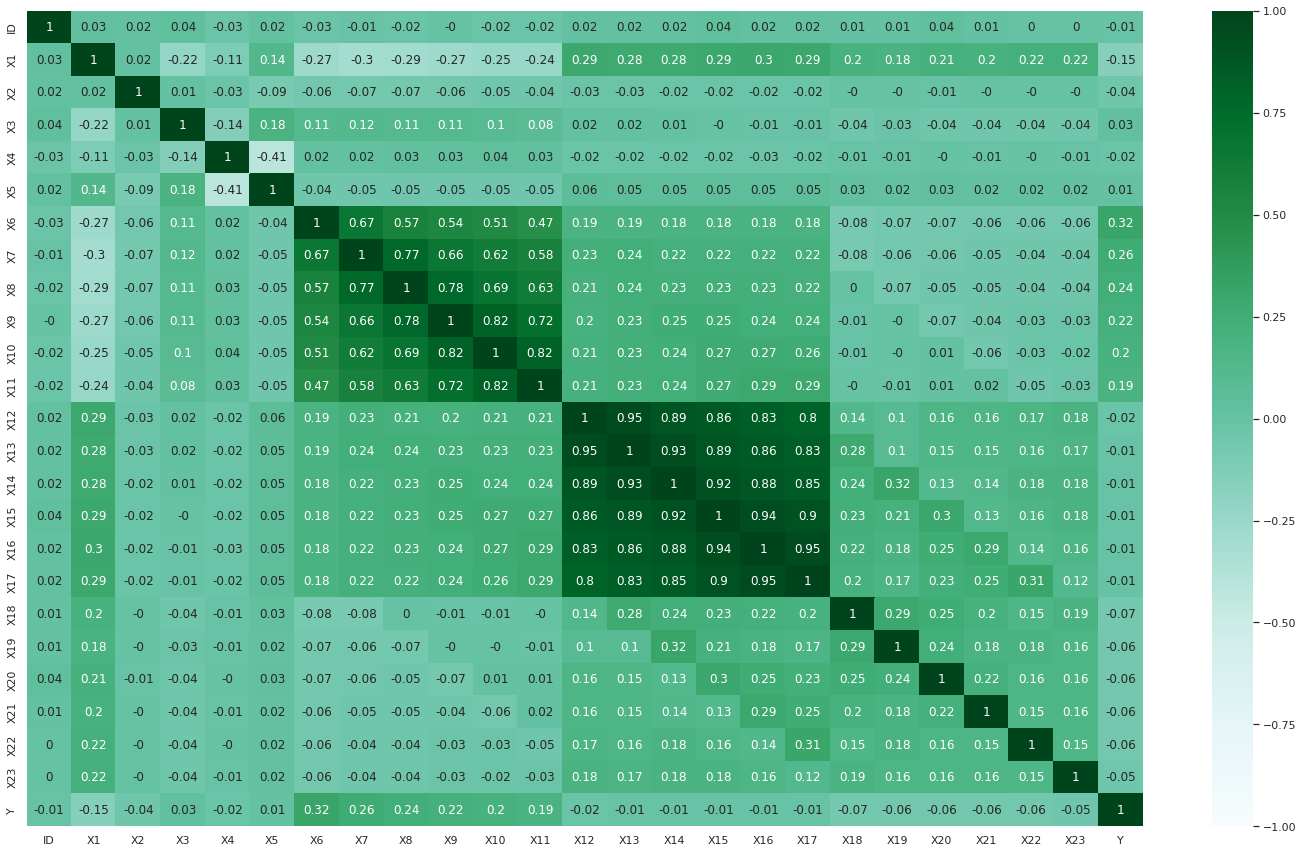

In [163]:
correlaciones = dfp.corr().round(2)
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(correlaciones, vmin = -1 , vmax = 1, cmap = 'BuGn', annot = True)

De primera instancia podemos notar que no existen correlación entre las primeras columnas de $x_{1}$ hasta $x_{5}$ esto puede ser debido al tipo de variables, por ejemplo:

* $x_{1}$ - representa la cantidad de crédito otorgado
* $x_{2}$ - el género del individuo.
* $x_{3}$ - el nivel educativo.
* $x_{4}$ - estado marital.
* $x_{5}$ - la edad.
* $Y$ - la probabilidad real de incumplimiento 

Estas variables no se esperan que estén correlacionadas por su naturaleza de carácter descriptivo con cualquiera de las otras 25 variables; sin embargo, las siguientes variables:

* $x_{6} - x_{11}$ - es el historial de pagos pasados desde los meses de Abril a Septiembre del año 2005.
*$x_{12}-x_{17}$ - indica el importe del estado de cuenta desde los meses de  Abril a Septiembre del año 2005.
*$x_{18}-x_{23}$ - indica el importe del pago anterior desde los meses de  Abril a Septiembre del año 2005.

Entonces, podemos crear una nueva dataframe ignorando las primeras variables enlistadas ya que no aportan nada relevante a la correlación. También notamos que apartir de la variable $x_{18}$ ya no existe una correlación alta a diferencia de las variables de $x_{6}-x_{17}$, por lo tanto:

Notamos que apartir de la variable $x_{18}$ ya no existe una correlación alta a diferencia de las variables de $x_{6}-x_{17}$, así que volvemos a aplicar una nueva dataframe:

In [164]:
ndfp = dfp[['X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17']]

In [168]:
cols = ['X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17']
summa = {'Varianzas': ndfp[cols].var()[0:12],
         'Valor Min': ndfp[cols].min()[0:12],
         'Valor Max': ndfp[cols].max()[0:12]
}
pd.DataFrame(summa, index = cols).transpose()

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17
Varianzas,1.262734,1.433189,1.430164,1.366746,1.283932,1.322458,5.423796e+09,5.067242e+09,4.810793e+09,4.139988e+09,3.697320e+09,3.547767e+09
Valor Min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.655800e+05,-6.977700e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05
Valor Max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.645110e+05,9.839310e+05,1.664089e+06,8.915860e+05,9.271710e+05,9.616640e+05


Urge normalizar antes de ejecutar el análisis por PCA

In [170]:
from sklearn.preprocessing import StandardScaler

escalar = StandardScaler()
escalamiento = escalar.fit_transform(ndfp)
escalamiento[:3]

array([[ 1.79473887,  1.78232182, -0.6969515 , -0.66655721, -1.53006015,
        -1.48603397, -0.64259711, -0.6474682 , -0.66805513, -0.67255377,
        -0.66312095, -0.65280202],
       [-0.87502348,  1.78232182,  0.13925645,  0.18883125,  0.23502713,
         1.99233989, -0.65931239, -0.6668126 , -0.63932046, -0.62170025,
        -0.60629957, -0.59805248],
       [ 0.0148973 ,  0.11167193,  0.13925645,  0.18883125,  0.23502713,
         0.25315296, -0.29870503, -0.49399135, -0.48249809, -0.44982095,
        -0.4172842 , -0.39174694]])

In [171]:
pcs = PCA()
pcs.fit(escalamiento)

PCA()

In [183]:
resumen_ndfp = pd.DataFrame({'Desviación estándar': np.sqrt(pcs.explained_variance_),
                             'Proporción de varianza explicada %': pcs.explained_variance_ratio_ * 100,
                             'Proporción de varianza acumulada %': np.cumsum(pcs.explained_variance_ratio_ *100)
                             })
resumen_ndfp = resumen_ndfp.transpose()
resumen_ndfp.columns = ['PC{}'.format(i) for i in range(1, len(resumen_ndfp.columns) + 1)]
resumen_ndfp.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Desviación estándar,2.5201,1.8394,0.8444,0.6438,0.5374,0.5133,0.4405,0.3696,0.3298,0.2572,0.2024,0.1997
Proporción de varianza explicada %,52.9217,28.1945,5.9410,3.4542,2.4063,2.1952,1.6170,1.1384,0.9065,0.5514,0.3414,0.3325
Proporción de varianza acumulada %,52.9217,81.1162,87.0571,90.5114,92.9177,95.1128,96.7298,97.8683,98.7748,99.3262,99.6675,100.0000


Ahora entendemos que con sólo 4 componentes ortogonales podemos obtener el 90.5% de la varianza de los datos.

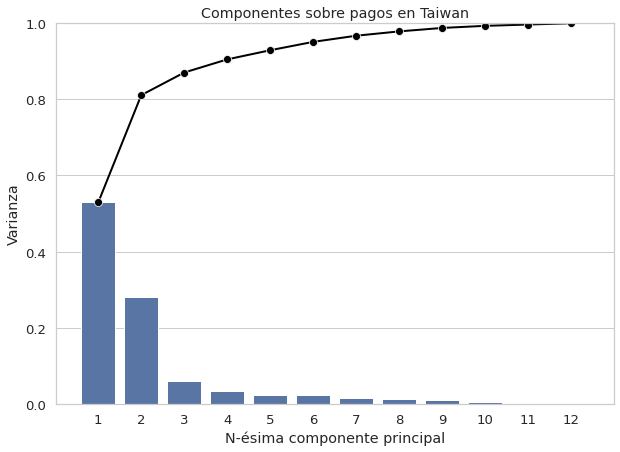

In [184]:
PC_componentes = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_componentes, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_componentes-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 legend = 'auto',
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Componentes sobre pagos en Taiwan')
plt.xlabel('N-ésima componente principal')
plt.ylabel('Varianza')
plt.ylim(0, 1)
plt.show()

In [174]:
pcscomponentes = pd.DataFrame(pcs.components_.transpose(), 
                                columns=resumen_ndfp.columns,
                                index=ndfp.columns
                                )
pcscomponentes.iloc[:,:12]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
X6,0.189951,-0.299193,-0.637500,-0.609147,-0.135299,0.239847,-0.140571,-0.036038,0.005270,0.002387,0.003203,-0.000736
X7,0.225442,-0.340358,-0.400041,0.273803,0.302788,-0.493447,0.489694,0.137996,0.055841,0.006071,-0.028183,-0.019194
X8,0.231131,-0.357737,-0.108737,0.542275,0.161448,0.149351,-0.603513,-0.310990,-0.011172,-0.002197,0.043479,0.037185
X9,0.237583,-0.362866,0.214521,0.203627,-0.230915,0.536024,0.225636,0.571495,-0.041081,-0.063213,-0.012634,-0.019862
X10,0.239972,-0.350424,0.388257,-0.158787,-0.179481,0.031116,0.390963,-0.664394,-0.090982,0.081133,-0.019283,0.031227
X11,0.233188,-0.321873,0.440399,-0.363047,0.047513,-0.499553,-0.398102,0.310646,0.087500,-0.025628,0.021053,-0.026693
X12,0.329544,0.233114,-0.112942,0.112622,-0.451269,-0.243265,-0.028658,0.034360,-0.452714,-0.219909,0.436504,0.320857
X13,0.339961,0.231773,-0.081312,0.118753,-0.368492,-0.147023,-0.087551,-0.011815,-0.119243,0.088174,-0.622871,-0.484588
X14,0.341884,0.230690,-0.019170,0.061764,-0.181354,0.009174,0.008398,0.022891,0.621671,0.550821,0.117924,0.297260
X15,0.345851,0.227499,0.039458,-0.039071,0.137260,0.106584,0.067209,-0.112498,0.425660,-0.581051,0.302278,-0.409873


In [186]:
pcscomponentes.iloc[:,:12].abs().idxmax()

PC1     X15
PC2      X9
PC3      X6
PC4      X6
PC5     X17
PC6      X9
PC7      X8
PC8     X10
PC9     X14
PC10    X15
PC11    X13
PC12    X16
dtype: object

En respuesta podemos analizar que para la componente 1, la variable $x_{15}$ que indica el importe del estado de cuenta del mes de Junio del año 2005, es la que más contribuye, para la componente 2, la variable $x_{9}$ es la de mayor contribución, y así respectivamente.

In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ndfp = scaler.fit_transform(ndfp)

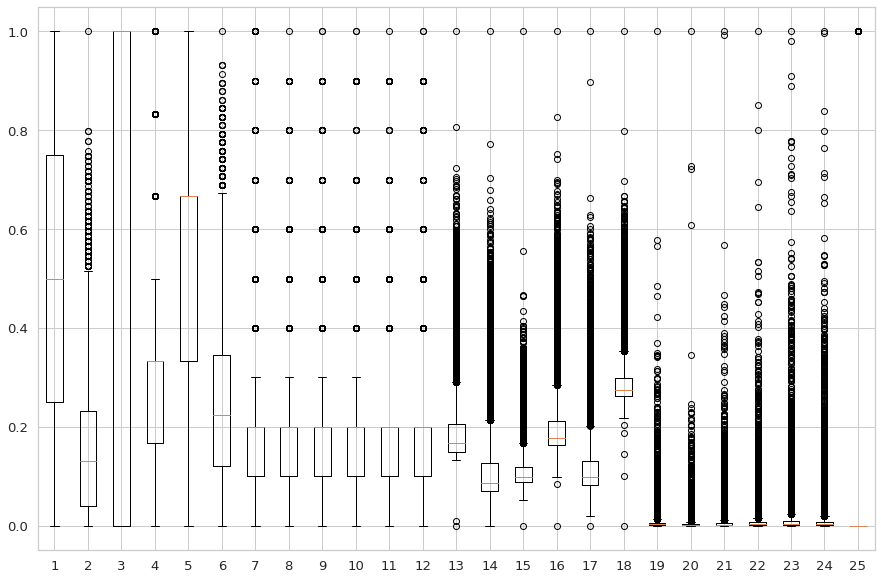

In [196]:
plt.boxplot(ndfp)
plt.show()

#Parte II

* ¿Cuál es el número de componentes mínimo y por qué?

*4 componentes en este caso porque describen al 90.5% la variabilidad de los datos que constituyen el análisis de PCA cada una de las componentes*

* ¿Cuál es la variación de los datos que representan esos componentes?

52.9217	28.1945	5.9410	3.4542 las primeras componentes, es decir el 90.5% 

* ¿Cuál es la pérdida de información después de realizar PCA?

Así como cuando un vector se descompone en sus componentes, uno pierde cierta certidumbre de como está proyectado el vector en otras cantidades vectoriales, lo mismo sucede en PCA al descomponer las variables en componentes, estás dejan de ser representativas de las mismas variables, entonces se pierde representación de las variables uno a uno con las componentes, y entonces se pierde cierta información de las variables originales, e igual se pierde la manera de interpretación de datos. 

* De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Eso lo pudimos mapear mediante el análisis de las componentes vs las variables, sabemos de lo anterior que no tenemos un filtro con que variable representa cada componente, pero sí la predominante mediante su varianza, en el caso de las variables originales, se encontraron que las más importantes porque constituyen a ese 90% la variabilidad son: $x_{15}, \ x_{9}, \ x_{6}$ y estás tienen su nomenclatura descrita en la parte superior. Lo que significa que las que tiene menor relevancia para el análisis son $x_{13}, \ x_{16}, \ x_{10}$ porque afectan en lo mínimo a esa correlación para reducir la dimensión


* ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
 
 Cuando se tienen muchos datos de $n \times m$ dimensiones $→ ∞$ es decir, a valores muy grandes de matrices con miles de columnas y millones de filas, uno pensaría que para leer esto sería fácil, pero en realidad, esto tiene un coste computacional alto para modelos de aprendizaje automático, implementar un modelo de regresión lineal o logística requiere de un análisis y manipulación extenso de datos, para esto PCA puede intervenir para reducir dimensiones de los datos enormes, bajar el coste computacional, facilitar la rapidez de cómputo, y la manipulación de datos a la hora de bosquejar modelos de IA. 

*Extensión: 200 palabras o más entre todas las respuestas. Sigue el formato pregunta-respuesta.*